# Lab 4 - Linear models

We focus on models in the form 

$$ y \sim \mathrm{Normal}(\alpha+X\beta,\sigma) $$



In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Excercise 1 - modelling height of !Kung people

In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

## Task 1. Prior predictive checks

In [3]:
model_ppc=CmdStanModel(stan_file='/home/height_1_ppc.stan')

R = 1000
sim =model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [4]:
df = sim.draws_pd()
df

,lp__,accept_stat__,mu,sigma,height
0,0.0,0.0,197.082,15.7772,177.009
1,0.0,0.0,171.276,13.6106,174.626
2,0.0,0.0,181.987,17.2653,198.749
3,0.0,0.0,175.554,15.5989,175.210
4,0.0,0.0,183.120,14.6579,178.560
...,...,...,...,...,...
995,0.0,0.0,169.728,15.5211,181.907
996,0.0,0.0,165.939,13.8066,169.719
997,0.0,0.0,163.635,14.8988,164.696
998,0.0,0.0,170.092,15.2480,146.814




1. Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3. Check if samples are consistent with priors.
4. Correct prior parameters to make them reasonably spreaded out. 
5. Check if observed data is possible to obtain using priors.

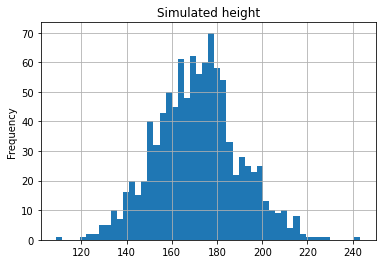

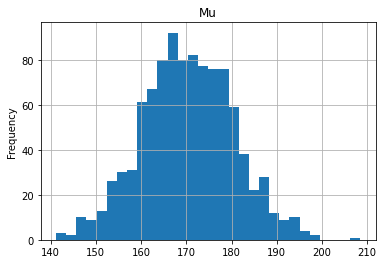

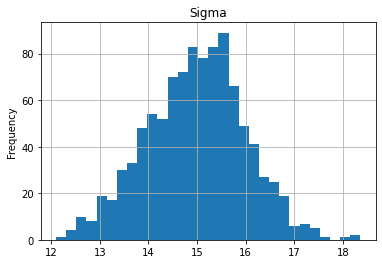

In [5]:
#ex 1
df['height'].plot.hist(bins = 50)
plt.title("Simulated height")
plt.grid()
plt.show()

df['mu'].plot.hist(bins = 30)
plt.title("Mu")
plt.grid()
plt.show()

df['sigma'].plot.hist(bins = 30)
plt.title("Sigma")
plt.grid()
plt.show()

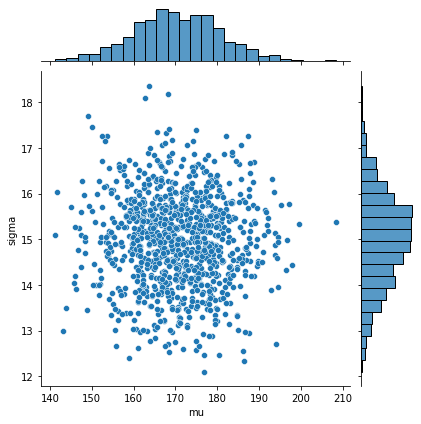

In [6]:
#ex 2
import seaborn as sns
sns.jointplot(x = df['mu'], y = df['sigma'])

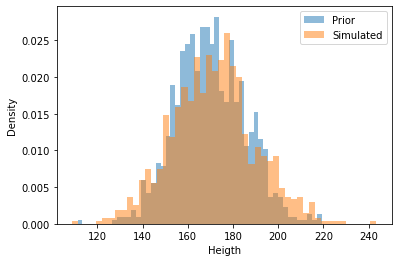

In [7]:
#ex 3
mu_prior = 170
sigma_prior = 15
height_prior = np.random.normal(mu_prior, sigma_prior, size = R)

fig, ax  = plt.subplots()
ax.hist(height_prior, bins = 50, alpha = 0.5, density = True, label = 'Prior')
ax.hist(df['height'], bins = 50, alpha = 0.5, density = True, label = 'Simulated')
ax.set_xlabel("Heigth")
ax.set_ylabel('Density')
ax.legend()
plt.show()

In [8]:
from scipy.stats import norm
height_sim = df['height']

height_mean_sim = np.mean(height_sim)
height_std_sim = np.std(height_sim)

observed_height = 170
z_score = (observed_height - height_mean_sim) / height_std_sim
p_value = 2 * (1 - norm.cdf(abs(z_score)))
print("Z score:")
print(z_score)
print("P value:")
print(p_value)

Z score:
-0.07790338312207329
P value:
0.9379049082498689


## Task 2. Model fit and evaluation

In [9]:
model_1_fit=CmdStanModel(stan_file='/home/height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [10]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status



chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                     

INFO:cmdstanpy:CmdStan done processing.


In [11]:
df2 = fit.draws_pd()
df2

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,heights_sample
0,-921.017,1.000000,0.985495,2.0,3.0,0.0,922.013,154.856,8.71233,154.382
1,-922.333,0.809176,0.985495,2.0,3.0,0.0,923.199,155.379,8.18948,164.387
2,-920.575,0.934847,0.985495,1.0,3.0,0.0,922.707,154.525,8.49139,165.743
3,-922.366,0.779792,0.985495,2.0,3.0,0.0,922.964,154.217,7.88149,160.599
4,-921.481,0.744562,0.985495,2.0,3.0,0.0,924.440,154.229,8.81336,146.147
...,...,...,...,...,...,...,...,...,...,...
3995,-920.632,1.000000,0.968371,2.0,3.0,0.0,920.722,154.719,8.54950,148.126
3996,-920.550,0.991325,0.968371,1.0,3.0,0.0,920.705,154.587,8.37065,143.160
3997,-921.451,0.819130,0.968371,1.0,3.0,0.0,921.673,154.057,8.25485,165.779
3998,-921.749,0.978199,0.968371,2.0,3.0,0.0,921.906,153.950,8.27889,149.376



1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.


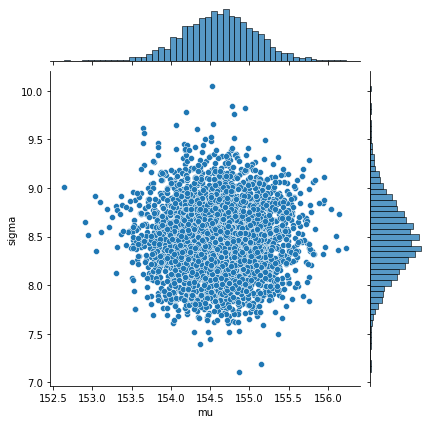

In [12]:
#ex 1
import seaborn as sns
sns.jointplot(x = df2['mu'], y = df2['sigma'])

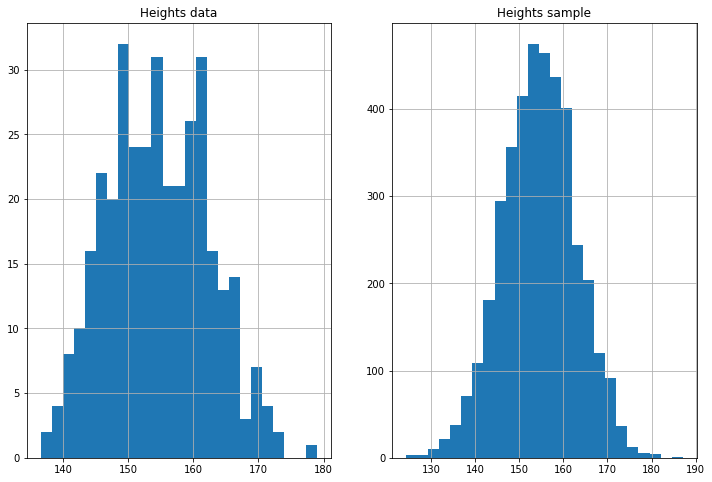

In [13]:
#ex 2
fig, ax = plt.subplots(1,2,figsize = (12,8))
ax[0].hist(d.height.values, bins = 25)
ax[1].hist(df2['heights_sample'], bins = 25)
ax[0].set_title("Heights data")
ax[1].set_title("Heights sample")
ax[0].grid()
ax[1].grid()

## Task 3. Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [14]:
d['c_weight'] = d['weight'] - d['weight'].mean()
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}


## Task 4. Prior predictive checks
 

In [15]:
model_ppc=CmdStanModel(stan_file='/home/height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /home/height_2a_ppc.stan to exe file /home/height_2a_ppc
INFO:cmdstanpy:compiled model executable: /home/height_2a_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [16]:
df3 = sim.draws_pd()
df3

,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,192.082,0.777181,13.7277,183.0150,162.696,185.656,199.239,214.387,...,217.478,227.869,223.661,206.603,184.562,196.655,200.818,215.545,209.483,214.908
1,0.0,0.0,153.011,-0.006780,14.9963,171.3240,164.491,164.189,170.759,171.281,...,193.014,152.558,139.421,150.564,138.625,160.637,137.288,151.401,172.455,151.751
2,0.0,0.0,160.730,-1.138640,13.7781,196.0960,173.244,172.887,182.692,179.040,...,171.003,127.904,166.276,149.315,170.922,143.336,156.167,147.903,140.425,143.174
3,0.0,0.0,155.179,-0.254452,14.4921,177.9810,148.993,155.232,144.407,154.860,...,160.185,154.169,157.436,172.388,145.054,144.315,164.032,143.990,156.643,145.433
4,0.0,0.0,155.066,1.671020,14.2973,94.4861,124.439,122.776,124.009,154.668,...,197.827,195.181,167.079,181.168,177.738,174.348,174.287,193.807,192.285,173.512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,156.877,1.261300,14.3942,153.5200,117.168,142.414,142.226,145.884,...,180.774,138.111,186.374,170.058,213.814,172.483,176.829,208.716,172.685,165.067
996,0.0,0.0,174.181,1.223380,15.6785,167.6620,167.721,152.202,162.443,139.058,...,181.666,198.622,198.811,164.591,206.307,186.331,161.756,215.658,190.260,193.231
997,0.0,0.0,162.396,-0.272051,12.2000,160.2400,181.275,175.545,166.926,169.176,...,151.092,153.667,166.036,136.593,159.795,168.294,144.172,161.412,148.015,151.573
998,0.0,0.0,139.058,0.987160,13.7746,137.6250,129.272,124.074,134.883,145.390,...,147.033,148.879,126.317,141.220,168.918,151.268,170.795,140.654,137.202,159.794


Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

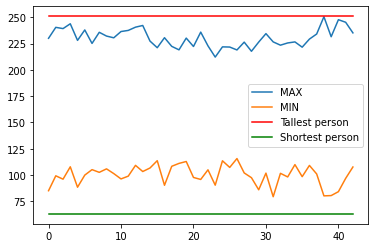

In [20]:
max_=[]
min_=[]
for i in range(1,44):
    name = "height[{a}]".format(a=i)
    max_.append(df3[name].max())
    min_.append(df3[name].min())

plt.plot(max_, label='MAX')
plt.plot(min_, label='MIN')
plt.plot([251] * len(max_), label='Tallest person', color='red')
plt.plot([63] * len(min_), label='Shortest person', color='green')
plt.legend()
plt.show()
    

## Task 5. Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


In [21]:
model_ppc=CmdStanModel(stan_file='/home/height_2b_ppc.stan')

INFO:cmdstanpy:compiling stan file /home/height_2b_ppc.stan to exe file /home/height_2b_ppc
INFO:cmdstanpy:compiled model executable: /home/height_2b_ppc


In [22]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [23]:
df4 = sim.draws_pd()
df4

,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,192.082,2.175330,13.7277,163.5540,144.1460,168.0160,182.5100,198.569,...,234.450,245.752,242.455,226.307,205.177,218.181,223.255,238.893,233.742,240.078
1,0.0,0.0,153.011,0.993243,14.9963,157.4040,151.2230,151.5720,158.7940,159.967,...,205.153,165.349,152.863,164.657,153.370,176.034,153.336,168.101,189.806,169.753
2,0.0,0.0,160.730,0.320255,13.7781,175.7890,153.8880,154.4810,165.2360,162.535,...,188.713,146.564,185.886,169.876,192.433,165.798,179.579,172.265,165.738,169.437
3,0.0,0.0,155.179,0.775342,14.4921,163.6470,135.3300,142.2400,132.0850,143.209,...,172.685,167.340,171.279,186.901,160.238,160.170,180.558,161.187,174.510,163.972
4,0.0,0.0,155.066,5.317560,14.2973,43.7283,76.0566,76.7689,80.3774,113.412,...,242.092,241.821,216.095,232.560,231.506,230.491,232.806,254.701,255.555,239.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,156.877,3.529990,14.3942,121.9410,87.0673,113.7910,115.0810,120.217,...,208.313,167.129,216.870,202.032,247.266,207.412,213.236,246.602,212.048,205.908
996,0.0,0.0,174.181,3.398650,15.6785,137.3840,138.8600,124.7580,136.4160,114.448,...,208.072,226.445,228.050,195.248,238.381,219.822,196.664,251.983,228.003,232.390
997,0.0,0.0,162.396,0.761815,12.2000,145.8490,167.5580,162.5010,154.5560,157.480,...,163.642,166.891,179.933,151.164,175.039,184.212,160.763,178.677,165.953,170.185
998,0.0,0.0,139.058,2.683600,13.7746,114.0120,106.7640,102.6700,114.5850,126.198,...,167.626,170.578,149.120,165.129,193.932,177.387,198.019,168.983,166.636,190.334


1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

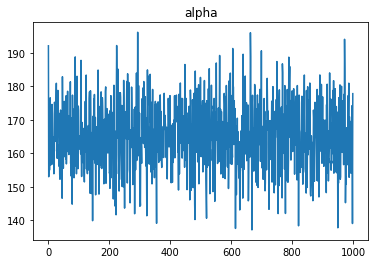

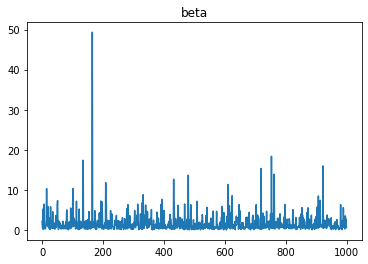

In [27]:
#ex 1
plt.plot(df4['alpha'])
plt.title("alpha")
plt.show()

plt.plot(df4['beta'])
plt.title('beta')
plt.show()

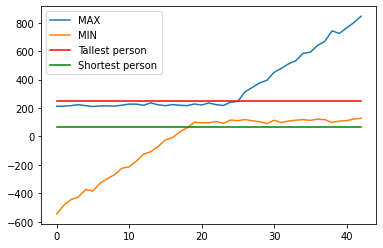

In [28]:
max_=[]
min_=[]
for i in range(1,44):
    name = "height[{a}]".format(a=i)
    max_.append(df4[name].max())
    min_.append(df4[name].min())

plt.plot(max_, label='MAX')
plt.plot(min_, label='MIN')
plt.plot([251] * len(max_), label='Tallest person', color='red')
plt.plot([63] * len(min_), label='Shortest person', color='green')
plt.legend()
plt.show()

## Task 6. Fitting and evaluating model


In [29]:
model_2_fit=CmdStanModel(stan_file='/home/height_2_fit.stan')

INFO:cmdstanpy:compiling stan file /home/height_2_fit.stan to exe file /home/height_2_fit
INFO:cmdstanpy:compiled model executable: /home/height_2_fit


1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe


In [30]:
N = 100
data_fit = {'N': N, 'weights': d.weight.values[:N], 'heights': d.height.values[:N]}
fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


In [31]:
df5 = fit.draws_pd()
df5

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,h_hat[91],h_hat[92],h_hat[93],h_hat[94],h_hat[95],h_hat[96],h_hat[97],h_hat[98],h_hat[99],h_hat[100]
0,-265.386,0.988800,0.102749,5.0,63.0,0.0,267.805,126.553,0.625192,9.48627,...,160.753,141.848,143.539,162.663,151.042,152.640,151.531,159.691,150.325,142.142
1,-265.062,0.994667,0.102749,5.0,31.0,0.0,265.860,125.009,0.653534,8.59649,...,155.051,179.570,166.680,160.534,152.488,168.338,145.839,160.196,174.650,150.673
2,-265.638,0.982672,0.102749,5.0,31.0,0.0,265.829,127.347,0.593277,8.24518,...,144.040,154.823,158.635,140.594,145.290,159.390,148.606,168.836,166.243,162.700
3,-265.738,0.984767,0.102749,4.0,31.0,0.0,266.902,130.185,0.544534,8.58647,...,154.200,152.180,150.953,153.259,148.900,168.221,137.712,160.275,165.084,169.118
4,-265.349,0.993192,0.102749,4.0,31.0,0.0,266.602,122.797,0.709095,8.20373,...,161.241,157.503,155.304,143.821,155.452,164.064,159.288,156.536,160.630,153.215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-266.059,0.976098,0.126923,5.0,31.0,0.0,267.536,117.722,0.809077,8.00508,...,173.687,156.058,150.802,164.745,141.474,163.671,147.867,167.610,156.636,164.022
3996,-266.315,0.710213,0.126923,5.0,31.0,0.0,268.026,116.608,0.832382,8.54471,...,159.138,156.914,163.716,163.086,156.425,170.063,157.092,155.614,141.097,144.819
3997,-265.984,0.956076,0.126923,4.0,15.0,0.0,266.672,118.354,0.802660,8.84369,...,156.870,162.994,148.077,152.405,145.993,168.604,156.446,159.067,161.263,149.697
3998,-265.867,0.999653,0.126923,5.0,31.0,0.0,266.766,130.968,0.520287,8.67356,...,160.983,163.464,152.412,160.850,166.157,159.322,149.398,158.040,170.304,160.085


2. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each value of weight plot mean simulated height along with errorbar of one standard deviation (use ```errorbar``` from matplotlib). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


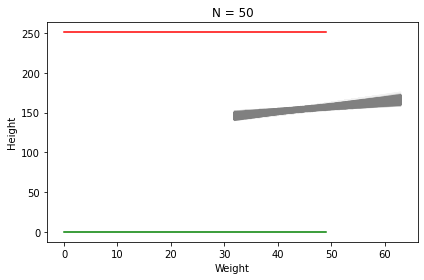

In [33]:
N = 50
data_fit = {'N': N, 'weights': d.weight.values[:N], 'heights': d.height.values[:N]}
fit=model_2_fit.sample(data=data_fit,seed=28052020)


alpha_samples = df5['alpha'].values
beta_samples = df5['beta'].values

for i in range(len(alpha_samples)):
    plt.plot(data_fit['weights'], beta_samples[i] * data_fit['weights'] + alpha_samples[i], 'gray', alpha=0.1)

plt.plot([251] * len(data_fit['weights']), label='Tallest person', color='red')
plt.plot([0] * len(data_fit['weights']), label='Shortest person', color='green')

plt.title('N = {}'.format(N))
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)





chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed 


INFO:cmdstanpy:CmdStan done processing.


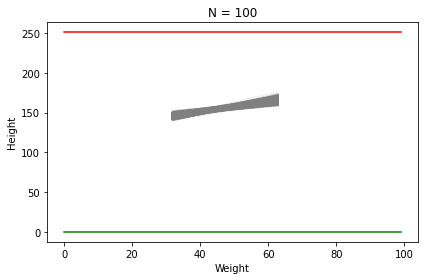

In [34]:
N = 100
data_fit = {'N': N, 'weights': d.weight.values[:N], 'heights': d.height.values[:N]}
fit=model_2_fit.sample(data=data_fit,seed=28052020)


alpha_samples = df5['alpha'].values
beta_samples = df5['beta'].values

for i in range(len(alpha_samples)):
    plt.plot(data_fit['weights'], beta_samples[i] * data_fit['weights'] + alpha_samples[i], 'gray', alpha=0.1)

plt.plot([251] * len(data_fit['weights']), label='Tallest person', color='red')
plt.plot([0] * len(data_fit['weights']), label='Shortest person', color='green')

plt.title('N = {}'.format(N))
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

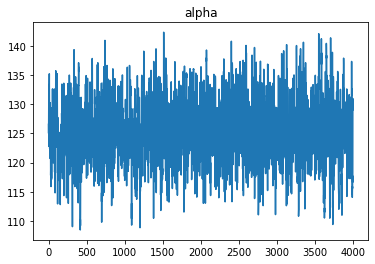

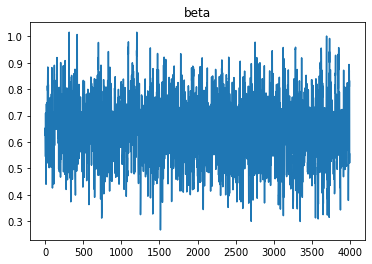

In [35]:
plt.plot(df5['alpha'])
plt.title("alpha")
plt.show()

plt.plot(df5['beta'])
plt.title('beta')
plt.show()

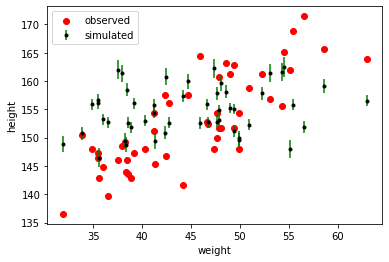

In [36]:
observed_heights = d['height'].head(50)
weights = d['weight'].head(50)
heights = df5.iloc[:,60:110]
std = heights.std()[:50]
mean = heights.mean()[:50]

plt.figure(16)
plt.errorbar(weights, mean, std, fmt="k.", ecolor="green", label="simulated")
plt.scatter(weights, observed_heights, color="red", label="observed")
plt.xlabel(f'weight')
plt.ylabel(f'height')
plt.legend(loc='best')
plt.show()

## Task 7. Extending the model

1. Center the weight data (substract mean vaule of weight from all values). Test how model works for such data. What is the interpretation of $\alpha$ in such case?
2. Using centered data modify your model with a second power of weight, select prior for its coefficient using prior predictive checks and after fitting check if model is still good.
3. Try to vectorize the model to avoid necessity of a for loop in the ```model``` block. 

In [37]:
N = 50
data_fit = {'N': N, 'weights': d.weight.values[:N], 'heights': d.height.values[:N]}
fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


In [38]:
df6 = fit.draws_pd()
df6

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,h_hat[41],h_hat[42],h_hat[43],h_hat[44],h_hat[45],h_hat[46],h_hat[47],h_hat[48],h_hat[49],h_hat[50]
0,-139.479,0.980019,0.208910,3.0,15.0,0.0,142.655,143.489,0.292592,13.78420,...,157.068,124.408,164.260,186.206,141.506,164.829,150.851,154.794,170.730,157.788
1,-137.339,1.000000,0.208910,2.0,7.0,0.0,140.756,141.357,0.260531,12.85280,...,163.577,139.207,157.758,167.690,154.149,139.873,163.155,142.957,178.801,179.801
2,-138.530,0.868141,0.208910,4.0,19.0,0.0,139.788,131.017,0.496980,10.66450,...,171.843,144.583,150.128,155.636,159.058,143.325,147.720,145.638,154.621,156.424
3,-138.167,0.999295,0.208910,5.0,31.0,0.0,139.128,145.953,0.170742,13.51400,...,149.502,134.685,143.622,150.427,165.412,168.172,147.989,156.249,150.420,147.950
4,-138.095,0.813853,0.208910,3.0,11.0,0.0,140.739,139.576,0.261210,12.86310,...,161.640,170.355,144.039,158.891,151.828,131.360,141.769,171.328,144.948,146.991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-138.544,0.975416,0.208298,4.0,23.0,0.0,139.762,135.777,0.430173,10.82010,...,134.226,150.941,157.051,168.529,148.642,158.549,138.296,154.322,145.489,175.804
3996,-139.078,0.981998,0.208298,3.0,15.0,0.0,141.666,127.833,0.583749,12.54660,...,151.403,166.002,171.156,155.615,158.518,167.221,149.614,169.540,167.902,173.043
3997,-141.112,0.895355,0.208298,4.0,31.0,0.0,141.918,122.752,0.626796,11.25490,...,164.404,158.662,161.292,152.643,145.005,166.743,142.514,138.905,160.410,160.171
3998,-142.084,0.977566,0.208298,4.0,15.0,0.0,143.720,129.829,0.473584,9.37804,...,152.750,155.683,163.344,137.119,159.042,154.942,148.236,162.334,157.011,160.115


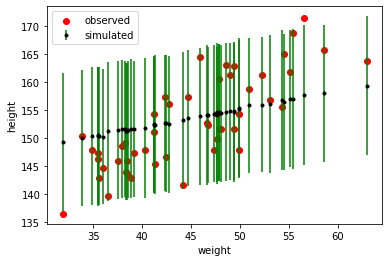

In [40]:
observed_heights = d['height'].head(50)
weights = d['weight'].head(50)
heights = df6.iloc[:,60:110]
std = heights.std()[:50]
mean = heights.mean()[:50]

plt.figure(16)
plt.errorbar(weights, mean, std, fmt="k.", ecolor="green", label="simulated")
plt.scatter(weights, observed_heights, color="red", label="observed")
plt.xlabel(f'weight')
plt.ylabel(f'height')
plt.legend(loc='best')
plt.show()